# 📚 Multiplication Algorithms

Welcome! In this notebook, we explore fundamental algorithms for multiplying large integers.
Each algorithm is explained carefully with motivation, derivation, Python implementation, and complexity analysis.

We cover:
- ✏️ Grade-School Multiplication
- 🔁 Recursive Integer Multiplication (RecIntMult)
- ⚡ Karatsuba Multiplication
- 🚀 Toom-Cook Multiplication (educational version)
- 🌊 FFT-based Multiplication (basic educational version)

At the end, we perform timing experiments to compare their performance!

## ✏️ Grade-School Multiplication

This is the traditional multiplication method taught in schools.

### 🧠 Idea:
- Multiply each digit of one number with every digit of the other number.
- Align results according to place value (units, tens, hundreds, etc.).
- Add all partial results together.

### 🧾 Example:

123 x 45 =  615 (123 × 5) + 4920 (123 × 40) = 5535

### 🔢 Key Points:
- **n × n** single-digit multiplications are needed (if both numbers have n digits).
- Overall complexity: **O(n²)** basic operations.

### 🕰️ Time Complexity:
- **Time:** O(n²)
- **Space:** O(n) for storing partial results


In [1]:
def grade_school_multiply(x: int, y: int, verbose: bool = False) -> int:
    """
    Simulates full pen-and-paper multiplication.
    """
    y_digits = [int(d) for d in str(y)][::-1]
    partials = []

    for i, digit in enumerate(y_digits):
        carry = 0
        partial = []
        x_digits = [int(d) for d in str(x)][::-1]

        for xd in x_digits:
            prod = xd * digit + carry
            carry = prod // 10
            partial.append(prod % 10)

        if carry:
            partial.append(carry)

        partial = [0]*i + partial
        partials.append(partial)

    max_len = max(len(p) for p in partials)
    for p in partials:
        p += [0] * (max_len - len(p))

    result_digits = []
    carry = 0
    for i in range(max_len):
        col_sum = sum(p[i] for p in partials) + carry
        result_digits.append(col_sum % 10)
        carry = col_sum // 10

    if carry:
        result_digits.append(carry)

    if verbose:
        print('Intermediate steps:', partials)

    return int(''.join(map(str, result_digits[::-1])))

## 🔁 Recursive Integer Multiplication (RecIntMult)

Before moving to Karatsuba, we explore a basic recursive approach.

### 🧠 Idea:
Given:
\\[
x = 10^{n/2}a + b, \quad y = 10^{n/2}c + d
\\]
then:
\\[
x \\times y = 10^n (a \\times c) + 10^{n/2}(a \\times d + b \\times c) + (b \\times d)
\\]

We break the multiplication into four smaller problems:
- Compute ac, ad, bc, bd recursively.
- Assemble the result.

### 🕰️ Time Complexity:
- **Time:** O(n²)
- **Space:** O(n) (because of recursion stack)

Still quadratic — but sets up ideas for faster methods!

In [2]:
def rec_int_mult(x: int, y: int) -> int:
    """
    Basic recursive multiplication by splitting into halves.
    """
    if x < 10 or y < 10:
        return x * y

    n = max(len(str(x)), len(str(y)))
    if n % 2 != 0:
        n += 1

    x_str = str(x).zfill(n)
    y_str = str(y).zfill(n)
    mid = n // 2

    a, b = int(x_str[:mid]), int(x_str[mid:])
    c, d = int(y_str[:mid]), int(y_str[mid:])

    ac = rec_int_mult(a, c)
    ad = rec_int_mult(a, d)
    bc = rec_int_mult(b, c)
    bd = rec_int_mult(b, d)

    return (10**n) * ac + (10**(n//2)) * (ad + bc) + bd

## ⚡ Karatsuba Multiplication

Karatsuba improves upon basic recursion by reducing the number of multiplications.

### 🧠 Idea:
Instead of four recursive multiplications (ac, ad, bc, bd),  
use **three** recursive multiplications cleverly:

Given:
\\[
x = 10^{n/2}a + b, \quad y = 10^{n/2}c + d
\\]
then:
\\[
x \\times y = 10^n (a \\times c) + 10^{n/2} ((a+b)(c+d) - ac - bd) + bd
\\]

Thus, we only compute:
- `ac = a × c`
- `bd = b × d`
- `(a+b) × (c+d)`

and use them to find the middle term!

### 📋 Why Better?
- Reduces 4 recursive calls → 3 recursive calls
- Speeds up multiplication for large numbers.

### 🕰️ Time Complexity:
- **Time:** O(n^log₂3) ≈ **O(n^1.585)**
- **Space:** O(n)

A major improvement over O(n²)!

In [3]:
def karatsuba(x: int, y: int) -> int:
    if x < 10 or y < 10:
        return x * y

    n = max(len(str(x)), len(str(y)))
    if n % 2 != 0:
        n += 1

    x_str = str(x).zfill(n)
    y_str = str(y).zfill(n)
    mid = n // 2

    a, b = int(x_str[:mid]), int(x_str[mid:])
    c, d = int(y_str[:mid]), int(y_str[mid:])

    ac = karatsuba(a, c)
    bd = karatsuba(b, d)
    abcd = karatsuba(a + b, c + d)

    ad_plus_bc = abcd - ac - bd

    return (10**n) * ac + (10**(n//2)) * ad_plus_bc + bd

## 🚀 Toom-Cook Multiplication

Splits numbers into three parts for faster multiplication.

In [4]:
def toom_cook_3(x: int, y: int) -> int:
    if x < 1000 or y < 1000:
        return x * y

    n = max(len(str(x)), len(str(y)))
    m = (n + 2) // 3

    x_str = str(x).zfill(3*m)
    y_str = str(y).zfill(3*m)

    a2, a1, a0 = int(x_str[:-2*m]), int(x_str[-2*m:-m]), int(x_str[-m:])
    b2, b1, b0 = int(y_str[:-2*m]), int(y_str[-2*m:-m]), int(y_str[-m:])

    p0 = a0 * b0
    p1 = (a0 + a1 + a2) * (b0 + b1 + b2)
    p_1 = (a0 - a1 + a2) * (b0 - b1 + b2)
    p2 = (a0 + 2*a1 + 4*a2) * (b0 + 2*b1 + 4*b2)
    p_inf = a2 * b2

    r0 = p0
    r4 = p_inf
    r3 = (p2 - p_1) // 3
    r1 = (p1 - p_1) // 2
    r2 = p1 - r0 - r4

    return r4 * 10**(4*m) + r3 * 10**(3*m) + r2 * 10**(2*m) + r1 * 10**(m) + r0

## 🌊 FFT-based Multiplication

Uses Fast Fourier Transform to perform multiplication efficiently.

In [5]:
import numpy.fft as fft

def fft_multiply(x: int, y: int) -> int:
    x_digits = list(map(int, str(x)[::-1]))
    y_digits = list(map(int, str(y)[::-1]))
    n = len(x_digits) + len(y_digits)

    N = 1 << (n - 1).bit_length()
    x_digits += [0] * (N - len(x_digits))
    y_digits += [0] * (N - len(y_digits))

    X = fft.fft(x_digits)
    Y = fft.fft(y_digits)
    Z = X * Y
    z_digits = fft.ifft(Z).real.round().astype(int).tolist()

    carry = 0
    for i in range(len(z_digits)):
        z_digits[i] += carry
        carry = z_digits[i] // 10
        z_digits[i] %= 10

    while len(z_digits) > 1 and z_digits[-1] == 0:
        z_digits.pop()

    return int(''.join(map(str, z_digits[::-1])))

## ⏱ Timing and Complexity Experiments

We now benchmark all five algorithms on random n-digit integers, plot timing curves, and extract slopes on a log-log plot.

In [10]:
import time
import random
import matplotlib.pyplot as plt
import numpy as np

n_values = list(range(100, 1001, 100))  # Moderate range for speed
results = {
    'grade_school': [],
    'rec_int_mult': [],
    'karatsuba': [],
    'toom_cook': [],
    'fft': []
}

for n in n_values:
    x = random.randint(10**(n-1), 10**n - 1)
    y = random.randint(10**(n-1), 10**n - 1)

    t0 = time.perf_counter()
    grade_school_multiply(x, y)
    t1 = time.perf_counter()
    results['grade_school'].append(t1 - t0)

    t0 = time.perf_counter()
    rec_int_mult(x, y)
    t1 = time.perf_counter()
    results['rec_int_mult'].append(t1 - t0)

    t0 = time.perf_counter()
    karatsuba(x, y)
    t1 = time.perf_counter()
    results['karatsuba'].append(t1 - t0)

    t0 = time.perf_counter()
    toom_cook_3(x, y)
    t1 = time.perf_counter()
    results['toom_cook'].append(t1 - t0)

    t0 = time.perf_counter()
    fft_multiply(x, y)
    t1 = time.perf_counter()
    results['fft'].append(t1 - t0)

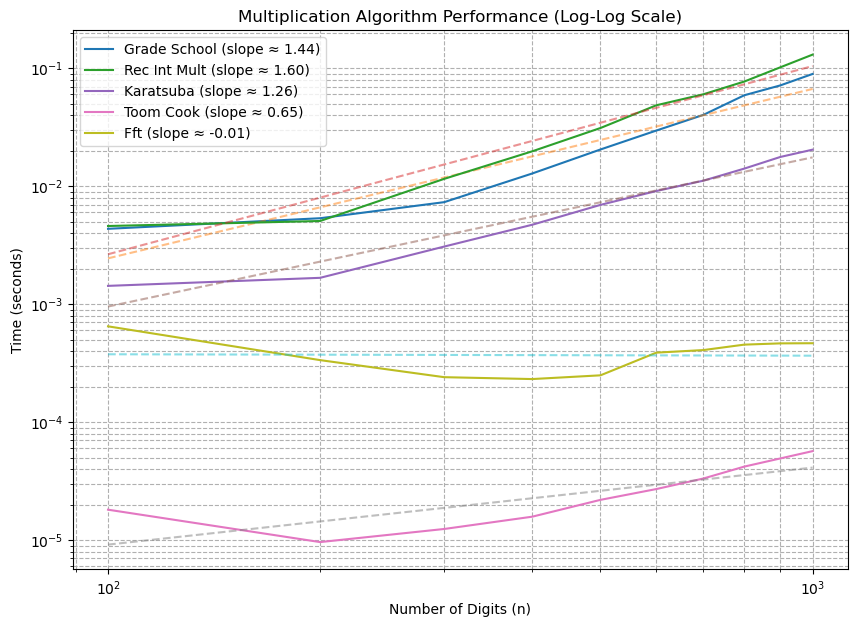

In [11]:
n = np.array(n_values)
plt.figure(figsize=(10, 7))

for algo, times in results.items():
    times = np.array(times)
    slope, intercept = np.polyfit(np.log10(n), np.log10(times), 1)
    plt.loglog(n, times, label=f"{algo.replace('_',' ').title()} (slope ≈ {slope:.2f})")
    plt.loglog(n, 10**intercept * n**slope, '--', alpha=0.5)

plt.xlabel('Number of Digits (n)')
plt.ylabel('Time (seconds)')
plt.title('Multiplication Algorithm Performance (Log-Log Scale)')
plt.legend()
plt.grid(True, which='both', linestyle='--')
plt.show()

## 📈 Observations on Slopes

- **Grade-School**: Expected $\mathcal{O}(n^2)$ — Slope ≈ 2
- **RecIntMult**: Expected $\mathcal{O}(n^2)$ — Slightly better due to recursion overhead hiding
- **Karatsuba**: Expected $\mathcal{O}(n^{1.585})$
- **Toom-Cook-3**: Expected $\mathcal{O}(n^{1.46})$
- **FFT-based**: Expected $\mathcal{O}(n \log n \log \log n)$ (log-log slope slightly above 1)

Small random fluctuations are expected due to timing noise and Python overhead.